# US Visa Prediction Project
**Life cycle of Machine learning Project**

* Understanding the Problem Statement
* Data Collection
* Exploratory data analysis
* Data Cleaning
* Data Pre-Processing
* Model Training 
* Choose best model

### About

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on working place and maintain requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

## 1) Problem statement.

* OFLC gives job certification applications for employers seeking to bring foreign workers into the United States and grants certifications.
* As In last year the count of employees were huge so OFLC needs Machine learning models to shortlist visa applicants based on their previous data.

**In this project i'm going to use the data given to build a Classification model:**

* This model is to check if Visa get approved or not based on the given dataset.
* This can be used to Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the certain criteria which influences the decision.


## 2) Data Collection.
* The Dataset is part of Office of Foreign Labor Certification (OFLC)
* The data consists of 25480 Rows and 12 Columns

https://www.kaggle.com/datasets/moro23/easyvisa-dataset

### 2.1 Import Data and Required Packages

**Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.**

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
import logging

warnings.filterwarnings("ignore")
# Set matplotlib's logging level to WARNING or ERROR to suppress DEBUG messages
logging.getLogger('matplotlib').setLevel(logging.WARNING)
%matplotlib inline

# Set display options for better readability
pd.set_option('display.max_columns', None)  # Display all columns
# pd.set_option('display.max_rows', 50)      # Display up to 50 rows
pd.set_option('display.width', 1000)        # Set width to prevent wrapping
pd.set_option('display.max_colwidth', 150)  # Show full width of columns


**Importing module as package**

In [2]:
# Import all strategy classes from basic_data_inspection
from analysis_src.basic_data_inspection import *

In [3]:
# Load the data
# Assuming you have already extracted the data into the 'extracted_data' folder

data_path = '../us_visa/data/extracted_data/EasyVisa.csv'
df = pd.read_csv(data_path)

**Initialize the object for DataInspector Class**

In [4]:
# Initialize the instance object for DataInspector class
data_inspector = DataInspector()

**Head of dataset**

In [5]:
data_inspector.execute_inspection(HeadInspection, df)


Default First 5 rows
  case_id continent education_of_employee has_job_experience requires_job_training  no_of_employees  yr_of_estab region_of_employment  prevailing_wage unit_of_wage full_time_position case_status
0  EZYV01      Asia           High School                  N                     N            14513         2007                 West         592.2029         Hour                  Y      Denied
1  EZYV02      Asia              Master's                  Y                     N             2412         2002            Northeast       83425.6500         Year                  Y   Certified
2  EZYV03      Asia            Bachelor's                  N                     Y            44444         2008                 West      122996.8600         Year                  Y      Denied
3  EZYV04      Asia            Bachelor's                  N                     N               98         1897                 West       83434.0300         Year                  Y      Denied
4  

**Tail of dataset**

In [6]:
data_inspector.execute_inspection(TailInspection, df)


Default Last 5 rows
         case_id continent education_of_employee has_job_experience requires_job_training  no_of_employees  yr_of_estab region_of_employment  prevailing_wage unit_of_wage full_time_position case_status
25475  EZYV25476      Asia            Bachelor's                  Y                     Y             2601         2008                South         77092.57         Year                  Y   Certified
25476  EZYV25477      Asia           High School                  Y                     N             3274         2006            Northeast        279174.79         Year                  Y   Certified
25477  EZYV25478      Asia              Master's                  Y                     N             1121         1910                South        146298.85         Year                  N   Certified
25478  EZYV25479      Asia              Master's                  Y                     Y             1918         1887                 West         86154.77         Year 

**Shape of datasets**

In [7]:
data_inspector.execute_inspection(ShapeInspection, df)


Rows and Columns in dataset
(25480, 12)


**DataTypes in dataset**

In [8]:
data_inspector.execute_inspection(DataTypesInspection, df)


Data Types and Non-null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB
None


**Summary of dataset**

In [9]:
data_inspector.execute_inspection(SummaryStatisticsInspection, df)


Summary Statistics (Numerical Features):
       no_of_employees   yr_of_estab  prevailing_wage
count     25480.000000  25480.000000     25480.000000
mean       5667.043210   1979.409929     74455.814592
std       22877.928848     42.366929     52815.942327
min         -26.000000   1800.000000         2.136700
25%        1022.000000   1976.000000     34015.480000
50%        2109.000000   1997.000000     70308.210000
75%        3504.000000   2005.000000    107735.512500
max      602069.000000   2016.000000    319210.270000

Summary Statistics (Categorical Features):
       case_id continent education_of_employee has_job_experience requires_job_training region_of_employment unit_of_wage full_time_position case_status
count    25480     25480                 25480              25480                 25480                25480        25480              25480       25480
unique   25480         6                     4                  2                     2                    5            4 

**Numerical Feature in dataset**

In [10]:
numerical_features = data_inspector.execute_inspection(NumericalFeatureInspection, df)

This dataset has 3 Numerical Features and they are : ['no_of_employees', 'yr_of_estab', 'prevailing_wage']


**Numerical Feature in dataset**

In [11]:
categorical_features = data_inspector.execute_inspection(CategoricalFeatureInspection, df)

This dataset has 9 Categorical Features and they are : ['case_id', 'continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position', 'case_status']


**Proportion of data on categorical feature**

In [12]:
data_inspector.execute_inspection(ProportionFeatureInspection, df)

case_id
EZYV01       0.003925
EZYV16995    0.003925
EZYV16993    0.003925
EZYV16992    0.003925
EZYV16991    0.003925
               ...   
EZYV8492     0.003925
EZYV8491     0.003925
EZYV8490     0.003925
EZYV8489     0.003925
EZYV25480    0.003925
Name: proportion, Length: 25480, dtype: float64
**************************************
continent
Asia             66.173469
Europe           14.646782
North America    12.919937
South America     3.343799
Africa            2.162480
Oceania           0.753532
Name: proportion, dtype: float64
**************************************
education_of_employee
Bachelor's     40.164835
Master's       37.810047
High School    13.422292
Doctorate       8.602826
Name: proportion, dtype: float64
**************************************
has_job_experience
Y    58.092622
N    41.907378
Name: proportion, dtype: float64
**************************************
requires_job_training
N    88.402669
Y    11.597331
Name: proportion, dtype: float64
*******************

**Value Count of data on categorical feature**

In [13]:
data_inspector.execute_inspection(ValueCountFeatureInspection, df)

case_id
EZYV01       1
EZYV16995    1
EZYV16993    1
EZYV16992    1
EZYV16991    1
            ..
EZYV8492     1
EZYV8491     1
EZYV8490     1
EZYV8489     1
EZYV25480    1
Name: count, Length: 25480, dtype: int64
**************************************
continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64
**************************************
education_of_employee
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: count, dtype: int64
**************************************
has_job_experience
Y    14802
N    10678
Name: count, dtype: int64
**************************************
requires_job_training
N    22525
Y     2955
Name: count, dtype: int64
**************************************
region_of_employment
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: count, dtype: int64
***********

**Check Null Value**

In [14]:
data_inspector.execute_inspection(IsNullFeatureInspection, df)


Number of Null Values in each feature:
case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64


**Check duplicated value**

In [15]:
data_inspector.execute_inspection(DuplicatedFeatureInspection, df)


Summary of Duplicated Values in each feature:
0


**Number of Unique value in each column**

In [16]:
data_inspector.execute_inspection(NuUniqueValueInspection, df)


Number of Unique Values in each colunm:
case_id                  25480
continent                    6
education_of_employee        4
has_job_experience           2
requires_job_training        2
no_of_employees           7105
yr_of_estab                199
region_of_employment         5
prevailing_wage          25454
unit_of_wage                 4
full_time_position           2
case_status                  2
dtype: int64


**Display all Unique value of feature**

In [17]:
data_inspector.execute_inspection(DisplayUniqueCatValueInspection, df)


Unique Values in each colunm:
case_id                  [EZYV01, EZYV02, EZYV03, EZYV04, EZYV05, EZYV06, EZYV07, EZYV08, EZYV09, EZYV10, EZYV11, EZYV12, EZYV13, EZYV14, EZYV15, EZYV16, EZYV17, EZYV18, E...
continent                                                                                                        [Asia, Africa, North America, Europe, South America, Oceania]
education_of_employee                                                                                                           [High School, Master's, Bachelor's, Doctorate]
has_job_experience                                                                                                                                                      [N, Y]
requires_job_training                                                                                                                                                   [N, Y]
no_of_employees          [14513, 2412, 44444, 98, 1082, 2339, 4985, 3035, 4810, 2251, 2465, 40

**Analysis for Missing Values**


Missing Values Count by Column:
Series([], dtype: int64)

Visualizing Missing Values...


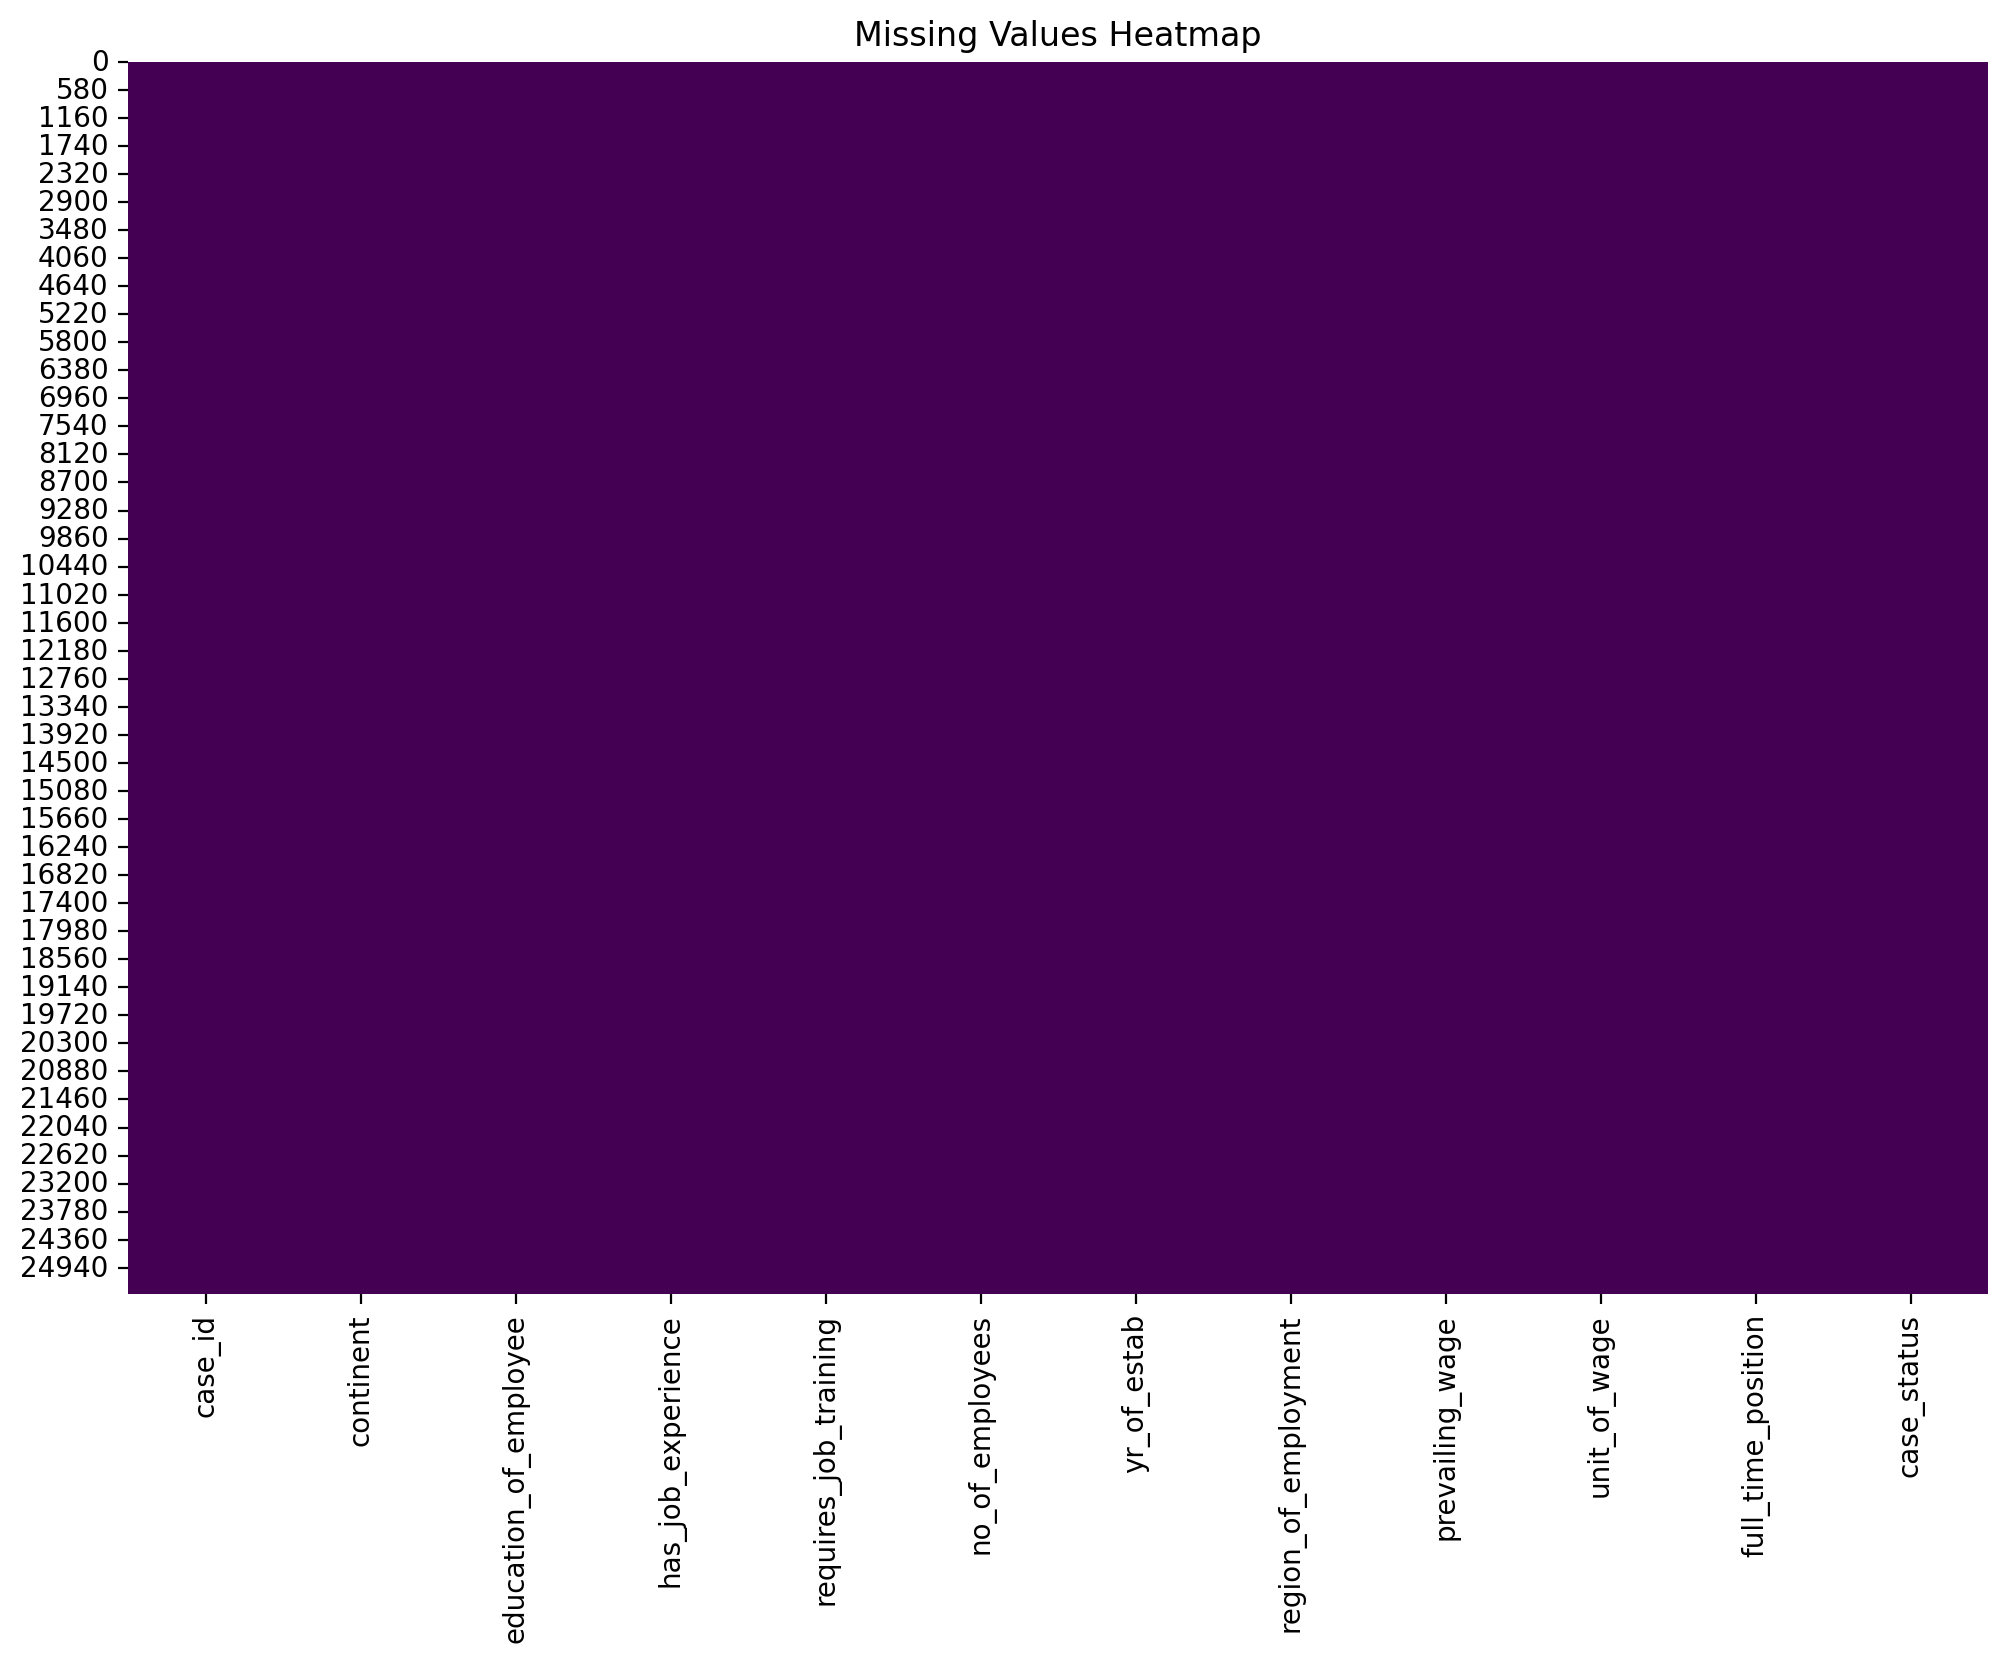

In [21]:
# Perform Missing Values Analysis
from analysis_src.missing_value_analysis import SimpleMissingValuesAnalysis

missing_values_analyzer = SimpleMissingValuesAnalysis()
missing_values_analyzer.analyze(df)

#### Insights

**Rows and Columns in Dataset:**
* The dataset contains 25,480 rows and 12 columns, indicating a sizable dataset for analysis with diverse feature categories.

**Data Types and Non-null Counts:**
* All columns contain non-null data across 12 fields, with `9` categorical features `(e.g., continent, case_status)` and `3` numeric features `(no_of_employees, yr_of_estab, prevailing_wage)`. This ensures no missing values, facilitating smooth analysis.

**Summary Statistics (Numerical Features):**
* The dataset's numerical features show that the average number of employees is 5,667, and the average establishment year is around 1979.
* The prevailing_wage has a wide range, with the highest wage reaching over 300,000. Some potential outliers (negative values in no_of_employees and unusually early establishment years) may need addressing.

**Proportion Distributions (Selected Categorical Features):**

* `continent:` Asia dominates at 66%, with other continents making up smaller proportions.
* `education_of_employee:` "Bachelor's" (40%) and "Master's" (38%) represent the majority, while "Doctorate" and "High School" are less common.
* `has_job_experience:` 58% of applicants have prior job experience.
* `requires_job_training:` Only 11.6% of cases require job training.
* `region_of_employment:` The Northeast region has the highest employment proportion (28.2%), followed closely by South (27.53%) and West (25.84%).
* `unit_of_wage:` Wages are mostly given per year (90%), followed by per hour (8%). Hence, most of them are yearly contracts.
* `full_time_position:` Nearly 90% of cases are full-time roles.
* `case_status:` "Certified" makes up 66.8% of cases, indicating a high acceptance rate.

**Missing Values Heatmap Insights**

**1. Colors Represent Missingness:**
- **Yellow**: Represents missing values. The more yellow you see in a column, the more missing data is present in that particular feature.
- **Purple (or dark color)**: Represents non-missing values. Columns that are mostly purple indicate that most of the data is present for that feature.

**2. Identifying Columns with Missing Data:**

**3. Understanding the Distribution of Missing Data:**
- **Randomly Distributed**:

- **Structured Missingness**:

**4. Assessing the Severity:**

* There is not a single missing value in dataset

### Univariant Analysis

* The term univariant analysis refers to the analysis of one variable prefix "uni" means "one". The purpose of univariant analysis is to understand the distribution of values for a single variable.

**Other Type of Analysis are:**

* `Bivariant Analysis:` The Analysis of two variable.
* `Multivariate Analysis:` The Analysis of two or more variable.